# **`Summary `**
===========

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
links = pd.read_csv('/content/links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
movies = pd.read_csv('/content/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
ratings = pd.read_csv('/content/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
tags = pd.read_csv('/content/tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [8]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [9]:
links.dropna(inplace=True)

In [11]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [14]:


links.shape


(9734, 3)

In [15]:
movies.shape

(9742, 3)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [18]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [20]:
ratings.shape

(100836, 4)

In [27]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [21]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [25]:
ratings['userId'].nunique()

610

In [33]:
d1 = pd.merge(ratings, movies, on='movieId')
d1.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [34]:
#Which movie has recieved maximum number of user ratings?

d1.groupby(['title'])['rating'].count().sort_values(ascending=False).head(1)


title
Forrest Gump (1994)    329
Name: rating, dtype: int64

In [35]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [36]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [37]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [38]:
#merge movies and tags datasets

d2 = pd.merge(tags, movies, on='movieId')
d2.head()


,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,62,60756,comedy,1528934384,Step Brothers (2008),Comedy
4,62,60756,funny,1528934381,Step Brothers (2008),Comedy


In [42]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

d2[d2['title'] == 'Matrix, The (1999)']['tag'].value_counts().head(10)


martial arts          1
sci-fi                1
alternate universe    1
philosophy            1
post apocalyptic      1
Name: tag, dtype: int64

In [43]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

d1[d1['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()


3.970982142857143

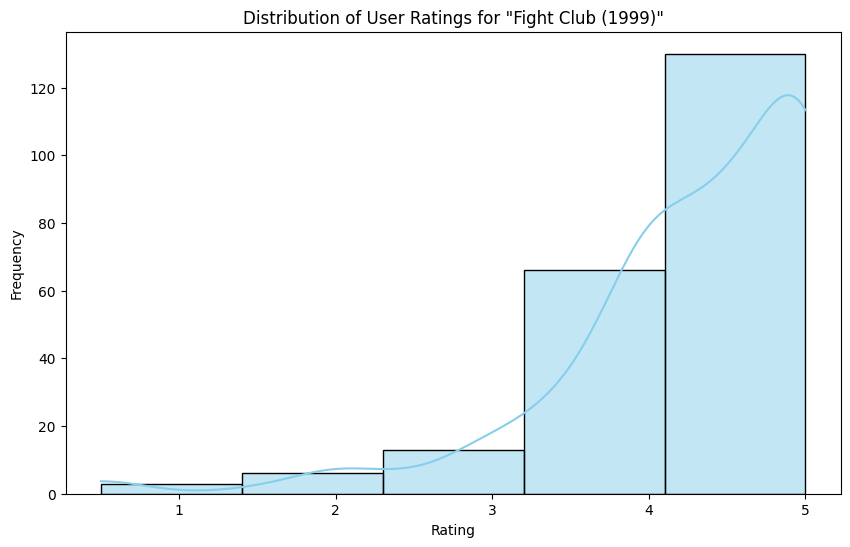

In [51]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [52]:
d1.groupby(['movieId'])['rating'].count().sort_values(ascending=False).head(10)


,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [53]:

movies_ratings = pd.merge(movies, d1.groupby(['movieId'])['rating'].agg(['count', 'mean']), on='movieId')
movies_ratings.head()


,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [111]:

d5=movies_ratings[movies_ratings['count'] > 50]
d5

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [112]:
# Which movie is the most popular based on  average user ratings?

d5.sort_values(by=['mean'], ascending=False).head(10)


,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
686,904,Rear Window (1954),Mystery|Thriller,84,4.261905
921,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690
6298,48516,"Departed, The (2006)",Crime|Drama|Thriller,107,4.252336
913,1213,Goodfellas (1990),Crime|Drama,126,4.250000
694,912,Casablanca (1942),Drama|Romance,100,4.240000


In [113]:
#Select all the correct options which comes under top 5 popular movies based on number of user ratings.

d5.nlargest(5, 'count')


,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [71]:
#Which Sci-Fi movie is "third most popular" based on the number of user ratings?

movies_ratings[movies_ratings['genres'].str.contains('Sci-Fi')].sort_values('count', ascending=False).head(3)


,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [114]:
d5[d5['genres'].str.contains('Sci-Fi')].sort_values('count', ascending=False).head(3)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [76]:
#merge movies_ratings and links

movies_ratings = movies_ratings.merge(links, on='movieId')
movies_ratings.head()


(9724, 5)

In [115]:
d6 = d5.merge(links, on='movieId')
d6.head()


,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [77]:
d3 = movies_ratings.merge(links, on='movieId')
d3.head()


,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429,113041,11862.0


In [117]:
d6.head()

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [86]:
d4=d3.loc[d3['count'] > 50]
d4.head()

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
6,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [92]:
#Mention the movieId of the movie which has the highest imdbId.

d4[d4.imdbId == d4.imdbId.max()]


,movieId,title,genres,count,mean,imdbId,tmdbId
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0


In [93]:
d4.loc[d4['imdbId'].idxmax()]

movieId                              109374
title      Grand Budapest Hotel, The (2014)
genres                         Comedy|Drama
count                                    52
mean                               3.778846
imdbId                              2278388
tmdbId                             120467.0
Name: 8354, dtype: object

In [102]:
#Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.
d4[d4.genres.str.contains("Sci-Fi")].sort_values('imdbId', ascending=False).head(1).movieId


8457    112852
Name: movieId, dtype: int64

In [105]:
d4[d4.genres.str.contains('Sci-Fi')].sort_values('imdbId', ascending=False).iloc[0]['title']


'Guardians of the Galaxy (2014)'

In [106]:
d4[d4.movieId == 112852]


,movieId,title,genres,count,mean,imdbId,tmdbId
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [125]:
d3.shape

(9724, 7)

In [108]:
d3[d3.movieId == 193587]


,movieId,title,genres,count,mean,imdbId,tmdbId
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.5,8391976,483455.0


In [110]:
d3[d3.movieId == 179053]


,movieId,title,genres,count,mean,imdbId,tmdbId
9612,179053,2048: Nowhere to Run (2017),Sci-Fi|Thriller,1,3.5,7387408,475759.0


In [118]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.na

In [122]:
d3[d3.movieId == 79132]

,movieId,title,genres,count,mean,imdbId,tmdbId
7355,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0


In [121]:
imdbid = '111161'  # Replace with your IMDb ID
rating = scrapper(imdbid)
print(f"IMDb Rating for tt{imdbid}: {rating}")

IMDb Rating for tt111161: 9.3


In [123]:
imdbid = '1375666'  # Replace with your IMDb ID
rating = scrapper(imdbid)
print(f"IMDb Rating for tt{imdbid}: {rating}")

IMDb Rating for tt1375666: 8.8
